<a href="https://colab.research.google.com/github/s7d1/STA365_W24_Bayes/blob/main/MT2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"?

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***.

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$).

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [ ]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations
# of this multinomial random variable, and note it's relationship to `n`

array([0, 6, 3, 1])

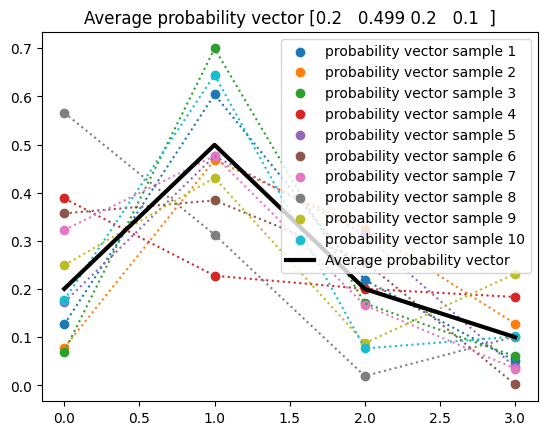

In [ ]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector");
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Over time t x(t) will have proportional counts of each type of chips sold based on the multinomial probability of them being bought by the customers.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


The posterior distribution should be a dirichlet distribution. We can treat the multinomials as k Bernoulli variables and when we pick one of the k chips that Bernoulli variable is true while the rest are false.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$.

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each.

In [ ]:
import pymc as pm
import numpy as np

x = [2, 5, 2, 1]

# Define the model
with pm.Model() as model:
    # Define the Dirichlet parameters
    alpha = np.ones(4)

    # Define the probability vector
    p = pm.Dirichlet('p', a=alpha)

    # Define the multinomial distribution
    y_obs = pm.Multinomial('y_obs', n=sum(x), p=p, observed=x)

    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=1000)

# Print the summary of the posterior distribution

pm.summary(trace, var_names=["p"])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.223,0.104,0.039,0.406,0.003,0.002,1338.0,1358.0,1.0
p[1],0.422,0.124,0.206,0.673,0.003,0.002,1500.0,1376.0,1.0
p[2],0.212,0.103,0.038,0.391,0.003,0.002,1295.0,1060.0,1.0
p[3],0.143,0.090,0.009,0.318,0.002,0.002,2026.0,1315.0,1.0


In [ ]:
j=1
with model:
  chain0_samples = trace.posterior['p'].values[0][:,j]
  chain1_samples = trace.posterior['p'].values[1][:,j]
  #print(f"Pj has mean value{chain0_samples.mean()} from {len(chain0_samples)} samples in the first chain.")
  #print(f"Pj has mean value{chain1_samples.mean()} from {len(chain1_samples)} samples in the second chain.")
  combined_samples = np.concatenate((chain0_samples, chain1_samples))
  print(f"Pj has mean value {combined_samples.mean()} from {len(combined_samples)} samples." )

Pj has mean value 0.4223533412716141 from 2000 samples.


4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [ ]:
q = stats.uniform().rvs(2000)
count = 0
with model:
    for i in range(len(combined_samples)):
        if q[i] < combined_samples[i]:
            count+=1
print(count/2000)

0.4105


5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$.


[0.15987045 0.69794892]


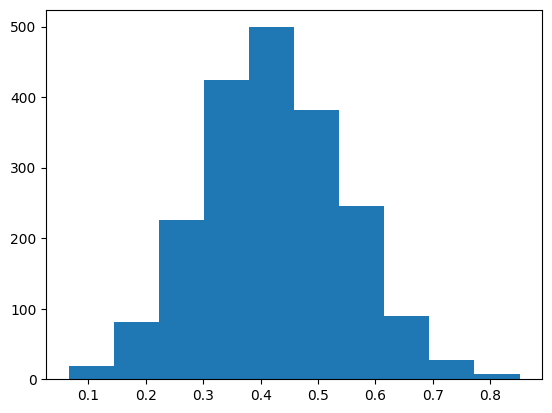

In [ ]:
# 97% hdi
a=0.015; b=0.985;
with model:
    plt.hist(combined_samples)
    print(np.quantile(combined_samples, [a,b]))

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [ ]:
j_complement = [x for x in range(4) if x!=j]

with model:
    for not_j in j_complement:
        count = 0
        chains = np.concatenate((trace.posterior['p'].values[0][:,not_j], trace.posterior['p'].values[1][:,not_j]))
        for i in range(len(combined_samples)):
          if chains[i] < combined_samples[i]:
            count +=1
        print(f"P(p{j+1}>p{not_j+1})={count/len(combined_samples)}")

P(p2>p1)=0.839
P(p2>p3)=0.866
P(p2>p4)=0.932


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


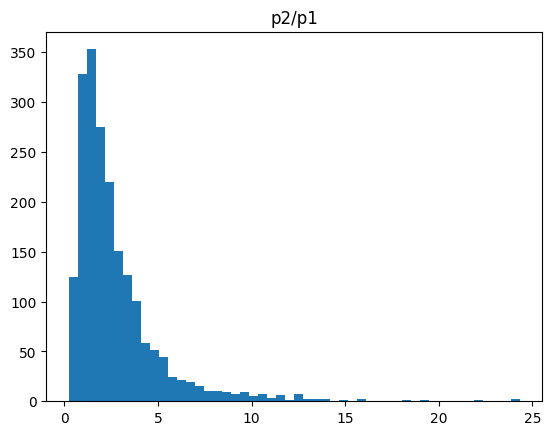

p2/p1 = [ 0.45434745 10.83335109]


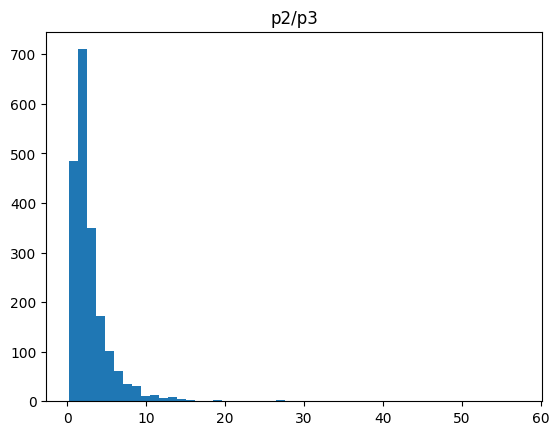

p2/p3 = [ 0.42618733 12.14115807]


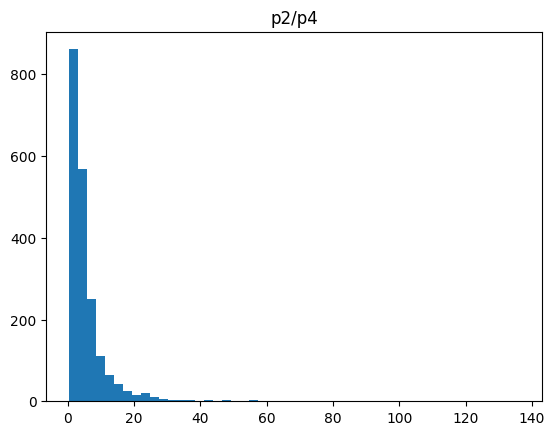

p2/p4 = [ 0.60545091 30.0797402 ]


In [ ]:
with model:
    for not_j in j_complement:
        count = 0
        chains = np.concatenate((trace.posterior['p'].values[0][:,not_j], trace.posterior['p'].values[1][:,not_j]))
        temp = []
        for i in range(len(combined_samples)):
          temp.append(combined_samples[i]/chains[i])
        plt.hist(temp, bins=50)
        plt.title(f"p{j+1}/p{not_j+1}")
        plt.show()
        print(f"p{j+1}/p{not_j+1} = {np.quantile(temp, [a,b])}")

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$.

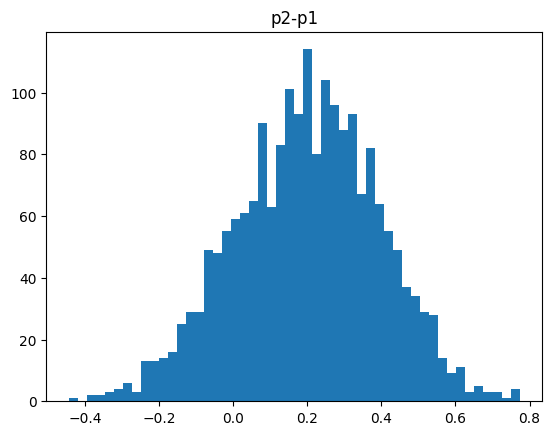

p2-p1 = [-0.2382753   0.60106264]


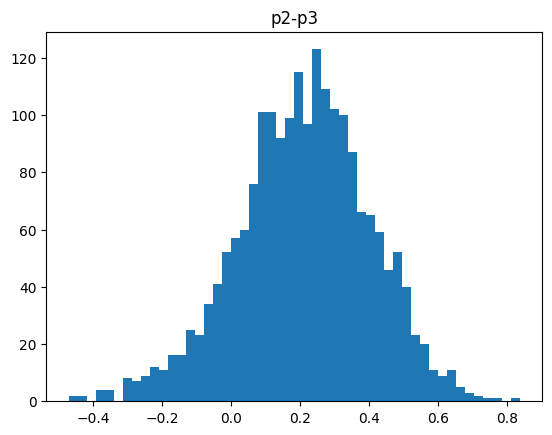

p2-p3 = [-0.25334187  0.61569648]


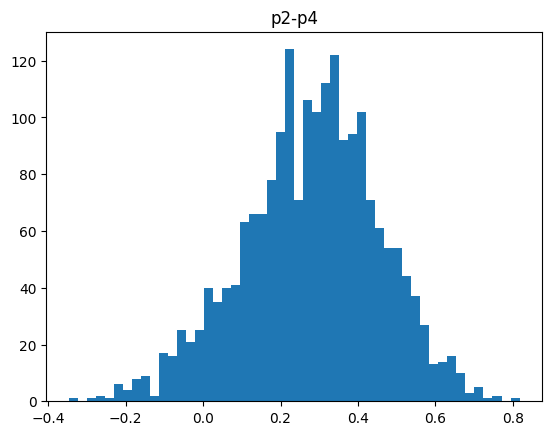

p2-p4 = [-0.14237607  0.64022076]


In [ ]:
with model:
    for not_j in j_complement:
        count = 0
        chains = np.concatenate((trace.posterior['p'].values[0][:,not_j], trace.posterior['p'].values[1][:,not_j]))
        temp = []
        for i in range(len(combined_samples)):
          temp.append(combined_samples[i]-chains[i])
        plt.hist(temp, bins=50)
        plt.title(f"p{j+1}-p{not_j+1}")
        plt.show()
        print(f"p{j+1}-p{not_j+1} = {np.quantile(temp, [a,b])}")

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


The ratio gives us how much more likely the jth chip will be bought compared to j-complement. The absolute difference can be used to estimate the magnitude of difference between the counts. The ratio remains the same for both small and large probabilities.

For $(j,j')=(2,3)$ and for $(j,j')=(4,5)$ the ratio is the same, but the absolute difference is not the same.  

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


t should be large in order for it to be similar to the true probabilities. We need to wait for the MCMC chains to become stationary and drop the values in the burn in period.